# Price Regression with Image Only

In [1]:
from ir_torch import ImageRegressionTorch

/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/annahan/miniforge3/envs/pytorch-1/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this

In [2]:
# Instantiate IRTorch

irtorch = ImageRegressionTorch(
  filepath='../0_main_dataset/data/df_5labels.json',
  img_dir='../pictures/',
  image_col='image_path',
  target_col='cleaned_price',
  testval_size=0.3,
  val_size=0.5,
  num_epochs=100,
  )

/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
/Users/annahan/miniforge3/envs/pytorch-1/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [3]:
# Load data
irtorch.df

,image_path,tags,uuid,length,price_length,cleaned_price,multi_label,not_empty
0,grandkoi_data/12a49e_High Quality Gin Rin Show...,"[Gin, Rin, Showa]",12a49e,32.0,10,34999.0,"[Gin, Rin, Showa]",True
1,grandkoi_data/9ac3a8_High Quality Gin Rin show...,"[Gin, Rin, showa]",9ac3a8,32.0,10,34999.0,"[Gin, Rin, showa]",True
2,grandkoi_data/66c804_Gin Rin Karashigoi.jpeg,"[Gin, Rin, Karashigoi]",66c804,28.0,9,6999.0,"[Gin, Rin]",True
3,grandkoi_data/34353c_Gin Rin Benigoi.jpeg,"[Gin, Rin, Benigoi]",34353c,25.0,9,4999.0,"[Gin, Rin]",True
4,grandkoi_data/b1c670_Tancho Sanke.jpeg,"[Tancho, Sanke]",b1c670,22.0,9,3499.0,"[Tancho, Sanke]",True
...,...,...,...,...,...,...,...,...
854,sacramentokoi_data/83d8dc_Tancho_Ochiba_14″_–_...,"[Tancho, Ochiba]",83d8dc,14.0,7,375.0,[Tancho],True
855,sacramentokoi_data/0e4681_Tancho_Sakura_Ogon_2...,"[Tancho, Sakura, Ogon]",0e4681,20.0,7,950.0,[Tancho],True
856,sacramentokoi_data/84af0c_Tancho_Sakura_Ogon_2...,"[Tancho, Sakura, Ogon]",84af0c,22.0,9,2100.0,[Tancho],True
857,sacramentokoi_data/10e266_Tancho_Showa_15″_–_2...,"[Tancho, Showa]",10e266,15.0,7,375.0,"[Tancho, Showa]",True


In [4]:
# Check the tensors
irtorch.tensor_checker()

<class 'torch.Tensor'> torch.Size([32, 3, 224, 224])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([32, 3, 224, 224])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([32, 3, 224, 224])
<class 'torch.Tensor'> torch.Size([32])


100%|██████████| 19/19 [00:05<00:00,  3.43it/s]


Epoch 1/20 | Train Loss(MSE): 29337082.6842, Train RMSE: 5416.3717, Train MAE: 2320.4122 | Val Loss(MSE): 15470119.2750, Val RMSE: 3933.2073, Val MAE: 1666.9061 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.72it/s]


Epoch 2/20 | Train Loss(MSE): 28986969.5526, Train RMSE: 5383.9548, Train MAE: 2261.4142 | Val Loss(MSE): 15230784.8187, Val RMSE: 3902.6638, Val MAE: 1614.5529 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.72it/s]


Epoch 3/20 | Train Loss(MSE): 29696058.3158, Train RMSE: 5449.4090, Train MAE: 2258.0314 | Val Loss(MSE): 15011571.3438, Val RMSE: 3874.4769, Val MAE: 1576.2173 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.76it/s]


Epoch 4/20 | Train Loss(MSE): 28264723.7895, Train RMSE: 5316.4578, Train MAE: 2195.2491 | Val Loss(MSE): 14794208.2750, Val RMSE: 3846.3240, Val MAE: 1550.3138 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.73it/s]


Epoch 5/20 | Train Loss(MSE): 27880389.5658, Train RMSE: 5280.1884, Train MAE: 2170.9432 | Val Loss(MSE): 14612033.7031, Val RMSE: 3822.5690, Val MAE: 1537.7382 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.78it/s]


Epoch 6/20 | Train Loss(MSE): 27837332.8158, Train RMSE: 5276.1096, Train MAE: 2189.4191 | Val Loss(MSE): 14443156.5828, Val RMSE: 3800.4153, Val MAE: 1533.1346 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.76it/s]


Epoch 7/20 | Train Loss(MSE): 27380007.4211, Train RMSE: 5232.5909, Train MAE: 2185.3052 | Val Loss(MSE): 14275784.3984, Val RMSE: 3778.3309, Val MAE: 1532.0073 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.77it/s]


Epoch 8/20 | Train Loss(MSE): 27634356.3158, Train RMSE: 5256.8390, Train MAE: 2204.2277 | Val Loss(MSE): 14141888.7273, Val RMSE: 3760.5703, Val MAE: 1539.2929 | LR: 0.010000


100%|██████████| 19/19 [00:04<00:00,  3.80it/s]


Epoch 9/20 | Train Loss(MSE): 26878023.8947, Train RMSE: 5184.4020, Train MAE: 2197.3517 | Val Loss(MSE): 13989448.1367, Val RMSE: 3740.2471, Val MAE: 1546.9680 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.74it/s]


Epoch 10/20 | Train Loss(MSE): 26503388.0263, Train RMSE: 5148.1441, Train MAE: 2202.4644 | Val Loss(MSE): 13866985.2192, Val RMSE: 3723.8401, Val MAE: 1554.7738 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.78it/s]


Epoch 11/20 | Train Loss(MSE): 26261027.5132, Train RMSE: 5124.5514, Train MAE: 2219.1184 | Val Loss(MSE): 13767151.2505, Val RMSE: 3710.4112, Val MAE: 1573.2618 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.79it/s]


Epoch 12/20 | Train Loss(MSE): 26742661.9737, Train RMSE: 5171.3308, Train MAE: 2264.5213 | Val Loss(MSE): 13660960.6752, Val RMSE: 3696.0737, Val MAE: 1611.3151 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.69it/s]


Epoch 13/20 | Train Loss(MSE): 25973952.6447, Train RMSE: 5096.4647, Train MAE: 2261.8498 | Val Loss(MSE): 13582544.1348, Val RMSE: 3685.4503, Val MAE: 1645.8723 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.80it/s]


Epoch 14/20 | Train Loss(MSE): 26041726.3947, Train RMSE: 5103.1095, Train MAE: 2296.7678 | Val Loss(MSE): 13485063.2422, Val RMSE: 3672.2014, Val MAE: 1678.3675 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.78it/s]


Epoch 15/20 | Train Loss(MSE): 26057857.6579, Train RMSE: 5104.6898, Train MAE: 2328.6416 | Val Loss(MSE): 13418254.9922, Val RMSE: 3663.0936, Val MAE: 1712.3073 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.71it/s]


Epoch 16/20 | Train Loss(MSE): 25570588.0526, Train RMSE: 5056.7369, Train MAE: 2323.0518 | Val Loss(MSE): 13337764.2297, Val RMSE: 3652.0904, Val MAE: 1749.1522 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.77it/s]


Epoch 17/20 | Train Loss(MSE): 25309100.1053, Train RMSE: 5030.8151, Train MAE: 2339.8386 | Val Loss(MSE): 13289806.2375, Val RMSE: 3645.5187, Val MAE: 1787.9356 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.71it/s]


Epoch 18/20 | Train Loss(MSE): 25077607.5263, Train RMSE: 5007.7547, Train MAE: 2354.5330 | Val Loss(MSE): 13244467.0281, Val RMSE: 3639.2949, Val MAE: 1822.5429 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.79it/s]


Epoch 19/20 | Train Loss(MSE): 25213756.1053, Train RMSE: 5021.3301, Train MAE: 2390.3602 | Val Loss(MSE): 13205689.2375, Val RMSE: 3633.9633, Val MAE: 1846.6749 | LR: 0.010000


100%|██████████| 19/19 [00:05<00:00,  3.78it/s]


Epoch 20/20 | Train Loss(MSE): 25215406.6546, Train RMSE: 5021.4945, Train MAE: 2413.7681 | Val Loss(MSE): 13180964.1312, Val RMSE: 3630.5598, Val MAE: 1876.8122 | LR: 0.010000
Start Training Time: 2025-06-05 20:37:18.194458, End Training Time: 2025-06-05 20:39:22.894456, Total Time: 0:02:04.699998


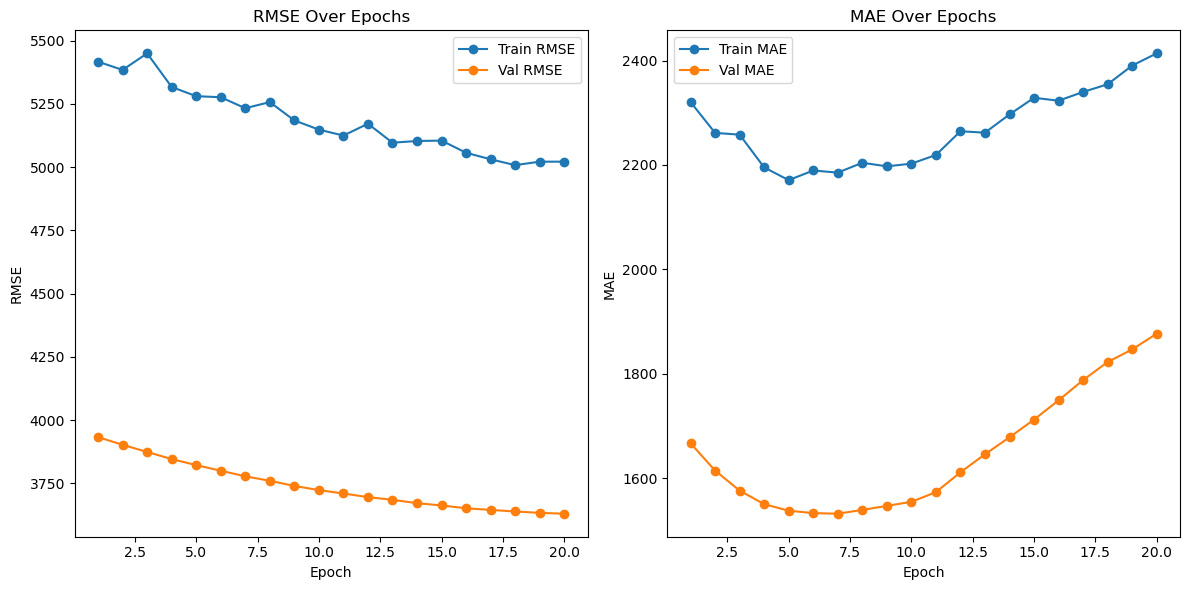

In [5]:
# Train the model
irtorch.train(num_epochs=20)

- The RSME is still slowly improving, but MAE is overfitting. This means that the model is getting better at curbing the large errors, but at the expense of increasing the smaller errors.
- The price outliers in the dataset are making it difficult for the model to predict across the board. 
- I will try removing the outliers and adding an upper limit dollar amount to model's range of predictions. 